# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install pandas<2.0.0
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
!pip install seaborn
!pip install bokeh==2.0.1
!pip install kaggle
# Without --no-cache-dir, smaller aws instances may have trouble installing

/bin/bash: line 1: 2.0.0: No such file or directory
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 168.8 MB/s eta 0:00:0000:01
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080015 sha256=93a2b0255d6c027870f7713653531287974df523da9bc6146c24be3a1057530d
  Stored in directory: /home/sagemaker-user/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eaba4e09b1acd2096a84ffef5275ea90806
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of blis to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!sudo mkdir -p /root/.kaggle
!sudo touch /root/.kaggle/kaggle.json
!sudo chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import os
import json

home_dir = os.path.expanduser("~")
kaggle_dir = os.path.join(home_dir, ".kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

kaggle_username = "geraldomargjini"
kaggle_key = "xxx"

kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_json_path, "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

os.chmod(kaggle_json_path, 0o600)

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
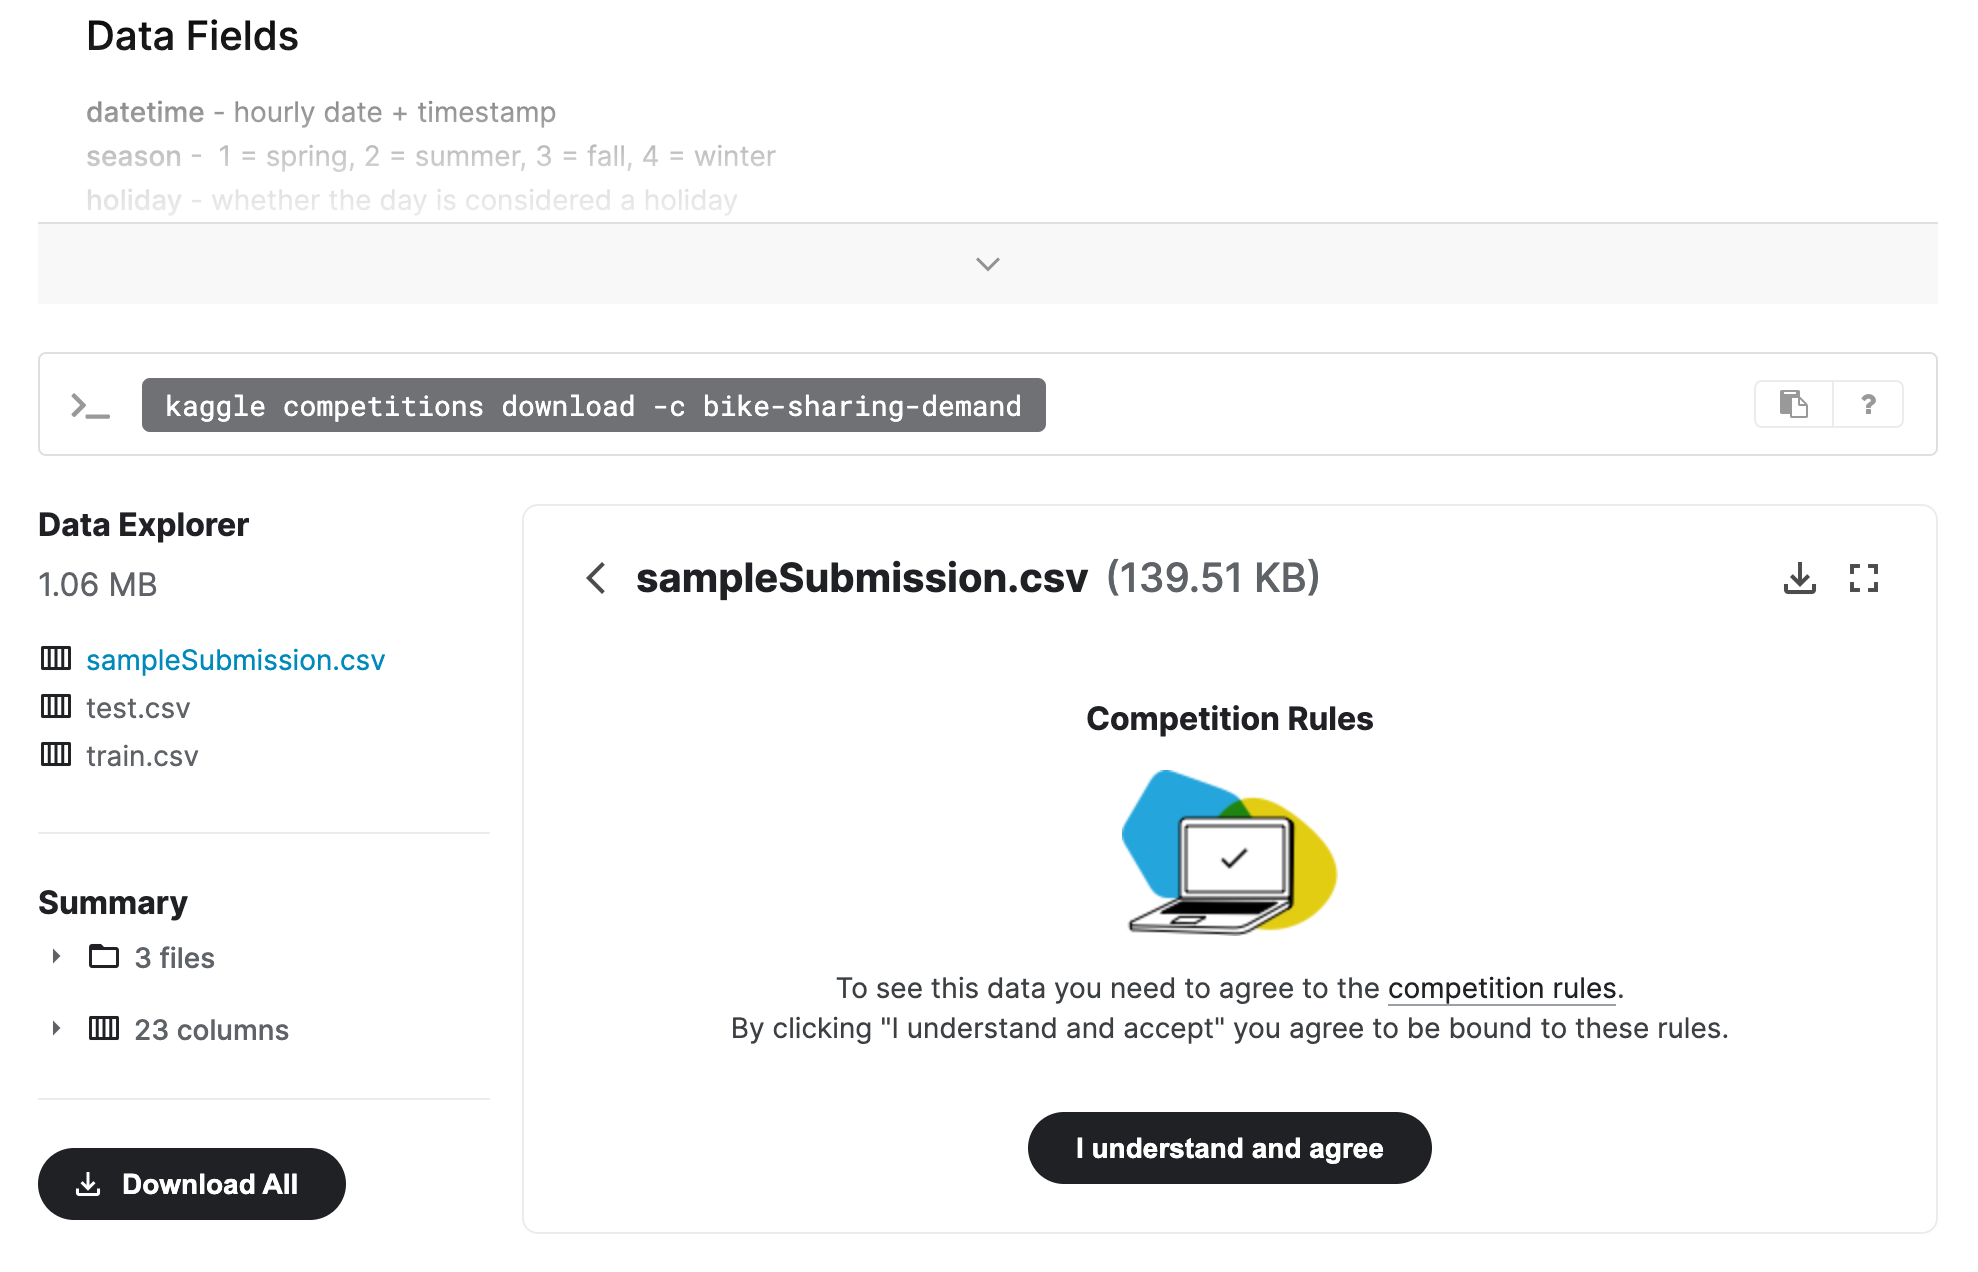

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
#!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
#!unzip -o bike-sharing-demand.zip

In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import seaborn as sn 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore 

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Let's remove the colum casual and registred because we are not gonna used them; 
train = train.drop(train.columns[-3:-1], axis=1)

# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,977.000000


In [8]:
# modify the type of the feature "date" to datatime64, is possible to use the parameter format because i know the format to do a faster conversion
train["datetime"] = pd.to_datetime(train["datetime"], format="%Y-%m-%d %H:%M:%S")

# check the type data of each feature
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(6)
memory usage: 850.6 KB


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")

#modify the type of the feature "date" to datatime64, is possible to use the parameter format because i know the format to do a faster conversion
test["datetime"] = pd.to_datetime(test["datetime"], format="%Y-%m-%d %H:%M:%S")

test.head()
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")

# modify the type of the feature "date" to datatime64, is possible to use the parameter format because i know the format to do a faster conversion
test["datetime"] = pd.to_datetime(test["datetime"], format="%Y-%m-%d %H:%M:%S")

test.head()
test.info()
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2012-01-13 09:27:47.765285632,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
min,2011-01-20 00:00:00,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2011-07-22 15:00:00,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,2012-01-20 23:00:00,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,2012-07-20 17:00:00,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,2012-12-31 23:00:00,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600
std,NaN,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151


In [11]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  6493 non-null   object
 1   count     6493 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.6+ KB


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [12]:
model_default_hyperp= {
    "XGB": {},               
    "GBM": {},                  
    "NN_TORCH": {},             
    "RF": {}                    
}

#predictor = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
#    train_data=train,
#    time_limit=600,
#    presets="best_quality",
#    hyperparameters=model_default_hyperp
#)


No path specified. Models will be saved in: "AutogluonModels/ag-20241224_113604"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 23 17:17:00 UTC 2024
CPU Count:          2
Memory Avail:       2.28 GB / 3.76 GB (60.5%)
Disk Space Avail:   19.73 GB / 19.99 GB (98.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of 

(_ray_fit pid=1151) [1000]	valid_set's rmse: 129.285


(_ray_fit pid=1223) 
(_ray_fit pid=1223) 
(_ray_fit pid=1223) /opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_ray_fit pid=1223) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=1223) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=1223) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=1223)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=1223) [1000]	valid_set's rmse: 135.098 [repeated 2x across cluster]


(_ray_fit pid=1257) 
(_ray_fit pid=1257) 
(_ray_fit pid=1291) 
(_ray_fit pid=1291) 
(_ray_fit pid=1291) /opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=1291) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=1291) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=1291) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=1291)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=1291) [1000]	valid_set's rmse: 124.896


(_ray_fit pid=1326) 
(_ray_fit pid=1326) 


(_ray_fit pid=1326) [1000]	valid_set's rmse: 134.058


(_ray_fit pid=1369) 
(_ray_fit pid=1369) 
(_ray_fit pid=1369) /opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 2x across cluster]
(_ray_fit pid=1369) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 2x across cluster]
(_ray_fit pid=1369) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 2x across cluster]
(_ray_fit pid=1369) This will raise in a future version. [repeated 2x across cluster]
(_ray_fit pid=1369)   warnings.warn(msg, FutureWarning) [repeated 2x across cluster]


(_ray_fit pid=1369) [1000]	valid_set's rmse: 134.479


(_ray_fit pid=1403) 
(_ray_fit pid=1403) 


(_ray_fit pid=1403) [1000]	valid_set's rmse: 136.511


(_dystack pid=1024) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1024) 	35.01s	 = Training   runtime
(_dystack pid=1024) 	1.36s	 = Validation runtime
(_dystack pid=1024) Fitting model: RandomForest_BAG_L1 ... Training model for up to 53.41s of the 100.88s of remaining time.
(_ray_fit pid=1403) /opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
(_ray_fit pid=1403) Dask dataframe query planning is disabled because dask-expr is not installed.
(_ray_fit pid=1403) You can install it with `pip install dask[dataframe]` or `conda install dask`.
(_ray_fit pid=1403) This will raise in a future version.
(_ray_fit pid=1403)   warnings.warn(msg, FutureWarning)
(_dystack pid=1024) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(_dystack pid=1024) 	15.52s	 = Training   runtime
(_dystack pid=1024) 	0.71s	 = Validation runtime
(_dystack pid=1024) Fitting model: XGBoost_BAG_L1 ... Training model for up to 36.78s of the 84.25s 

### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -115.664737  root_mean_squared_error       4.585926  418.054135                0.000869           0.031058            3       True         10
1        LightGBM_BAG_L2 -116.184582  root_mean_squared_error       3.447240  284.860005                0.068832          24.337936            2       True          6
2         XGBoost_BAG_L2 -116.469964  root_mean_squared_error       3.492904  284.354937                0.114496          23.832868            2       True          8
3    RandomForest_BAG_L1 -116.548359  root_mean_squared_error       0.727952   16.843220                0.727952          16.843220            1       True          2
4    WeightedEnsemble_L2 -116.548359  root_mean_squared_error       0.728704   16.877689               

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -131.054161598899,
  'RandomForest_BAG_L1': -116.54835939455667,
  'XGBoost_BAG_L1': -131.89393473529245,
  'NeuralNetTorch_BAG_L1': -140.79656764130172,
  'WeightedEnsemble_L2': -116.54835939455667,
  'LightGBM_BAG_L2': -116.18458156612952,
  'RandomForest_BAG_L2': -118.76942773700958,
  'XGBoost_BAG_L2': -116.46996357631149,
  'NeuralNetTorch_BAG_L2': -119.16733721003662,
  'WeightedEn

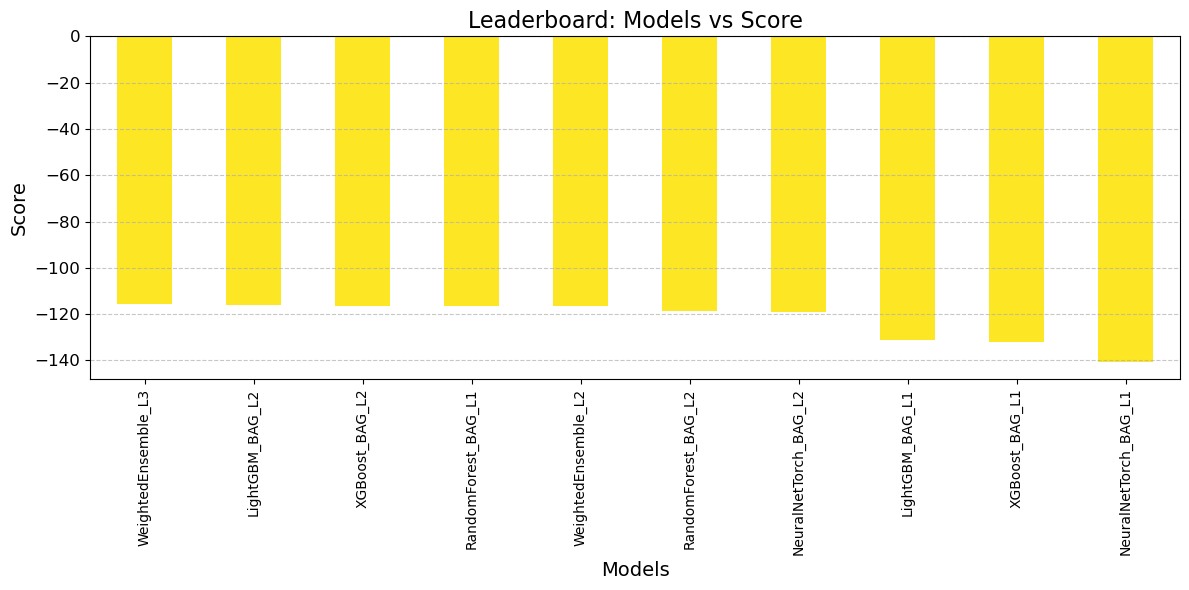

In [32]:
leaderboard = predictor.leaderboard(silent=True)

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.viridis(leaderboard["score_val"] / leaderboard["score_val"].max())

leaderboard.plot(
    kind="bar",
    x="model",
    y="score_val",
    ax=ax,
    color=colors,
    legend=False
)

plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Leaderboard: Models vs Score", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.tight_layout()
plt.show()

### Create predictions from test dataset

In [18]:
# I had problems taking only the first five element because they was not ordered as expected;

sorted_leaderboard = predictor.leaderboard(silent=True).sort_values(by='score_val', ascending=False)
top5_best_model = sorted_leaderboard['model'].head(5).tolist()
print(top5_best_model)

['WeightedEnsemble_L3', 'LightGBM_BAG_L2', 'XGBoost_BAG_L2', 'RandomForest_BAG_L1', 'WeightedEnsemble_L2']


In [20]:
prediction_list_NoHypNoEDA = []

for model in top5_best_model:
    predictionNoHypNoEDA = predictor.predict(test, model=model)
    prediction_list_NoHypNoEDA.append(predictionNoHypNoEDA)

In [23]:
file_names = [
    "NoHypNoEDA_dir/SubmissionNoHypNoEDAModel1.csv",
    "NoHypNoEDA_dir/SubmissionNoHypNoEDAModel2.csv",
    "NoHypNoEDA_dir/SubmissionNoHypNoEDAModel3.csv",
    "NoHypNoEDA_dir/SubmissionNoHypNoEDAModel4.csv",
    "NoHypNoEDA_dir/SubmissionNoHypNoEDAModel5.csv"
]

# Be sure that count prediction don't have negative value 
    
for prediction in prediction_list_NoHypNoEDA:
    if (prediction.describe().min() < 0):
        prediction = prediction.clip(lower=0)
        

for prediction, file_name in zip(prediction_list_NoHypNoEDA, file_names):
    submissionNoHypNoEDA = pd.read_csv(file_name)
    submissionNoHypNoEDA["count"] = prediction
    submissionNoHypNoEDA.to_csv(file_name, index=False)

### Set predictions to submission dataframe, save, and submit

In [25]:
!kaggle competitions submit -c bike-sharing-demand -f NoHypNoEDA_dir/SubmissionNoHypNoEDAModel1.csv -m "Test_Model1 with no hyperparameter using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypNoEDA_dir/SubmissionNoHypNoEDAModel2.csv -m "Test_Model2 with no hyperparameter using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypNoEDA_dir/SubmissionNoHypNoEDAModel3.csv -m "Test_Model3 with no hyperparameter using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypNoEDA_dir/SubmissionNoHypNoEDAModel4.csv -m "Test_Model4 with no hyperparameter using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypNoEDA_dir/SubmissionNoHypNoEDAModel5.csv -m "Test_Model5 with no hyperparameter using: XGB, GBM, NN_TORCH, RF"



100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 692kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 753kB/s]
100%|█████████████████████████████████████████| 189k/189k [00:00<00:00, 747kB/s]
100%|█████████████████████████████████████████| 183k/183k [00:00<00:00, 686kB/s]
100%|█████████████████████████████████████████| 183k/183k [00:00<00:00, 725kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                        date                 description                                                                        status    publicScore  privateScore  
------------------------------  -------------------  ---------------------------------------------------------------------------------  --------  -----------  ------------  
SubmissionNoHypNoEDAModel5.csv  2024-12-24 12:04:33  Test_Model5 with no hyperparameter using: XGB, GBM, NN_TORCH, RF                   complete  1.42059      1.42059       
SubmissionNoHypNoEDAModel4.csv  2024-12-24 12:04:31  Test_Model4 with no hyperparameter using: XGB, GBM, NN_TORCH, RF                   complete  1.42059      1.42059       
SubmissionNoHypNoEDAModel3.csv  2024-12-24 12:04:30  Test_Model3 with no hyperparameter using: XGB, GBM, NN_TORCH, RF                   complete  1.43894      1.43894       
SubmissionNoHypNoEDAModel2.csv  2024-12-24 12:04:28  Test_Model2 with no hyperparameter using: XGB, GBM, NN_TORCH, RF             

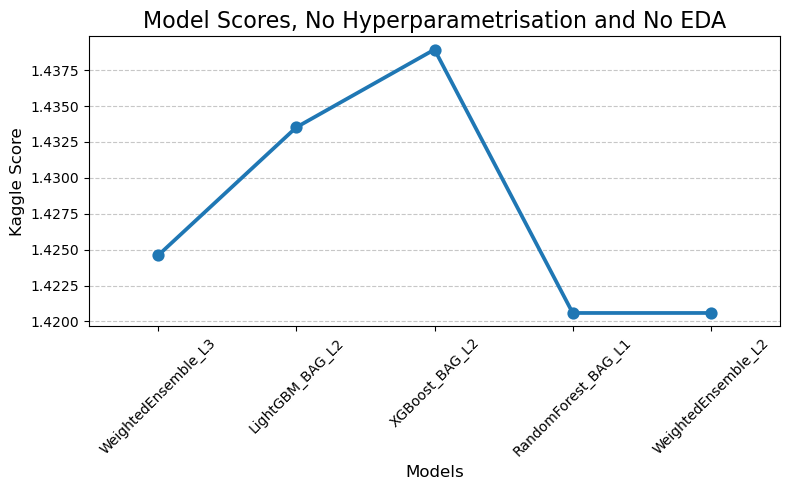

In [35]:
kaggleScoreNoHypNoEDA = [1.42460, 1.43352, 1.43894, 1.42059, 1.42059]
data = pd.DataFrame({'Model': top5_best_model, 'Score': kaggleScoreNoHypNoEDA})

# Plot
plt.figure(figsize=(8, 5))
sns.pointplot(data=data, x='Model', y='Score', markers='o', linestyles='-')

plt.title("Model Scores, No Hyperparametrisation and No EDA", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Kaggle Score", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Initial score of `[1.42460, 1.43352, 1.43894, 1.42059, 1.42059] `

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

In [36]:
# create a new feature: 

train["hour"] = train["datetime"].dt.hour
test["hour"] = test["datetime"].dt.hour

train["weekday"] = train["datetime"].dt.day_name()
test["weekday"] = test["datetime"].dt.day_name()

train["month"] = train["datetime"].dt.month_name()
test["month"] = test["datetime"].dt.month_name()

#I will use some of the previous feature to creates some new one below

train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
test["season"] = test.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })
test["weather"] = test.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

#Remove the column datetime because we already extract all the need data: 
train = train.drop("datetime", axis=1)
test = test.drop("datetime", axis=1)

#Let's change the category of our feature to be better imterpretabgle by our model

catVar = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in catVar:
    train[var] = train[var].astype("category")
    
for var in catVar:
    test[var] = test[var].astype("category")

train.describe()

,temp,atemp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132
std,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.82000,0.760000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000


In [37]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,16,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,40,1,Saturday,January
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,32,2,Saturday,January
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,13,3,Saturday,January
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,1,4,Saturday,January


/tmp/ipykernel_208/3456084985.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(data=train, y="count", palette="Set2", orient="v", legend=False, ax=axes[0][0])


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

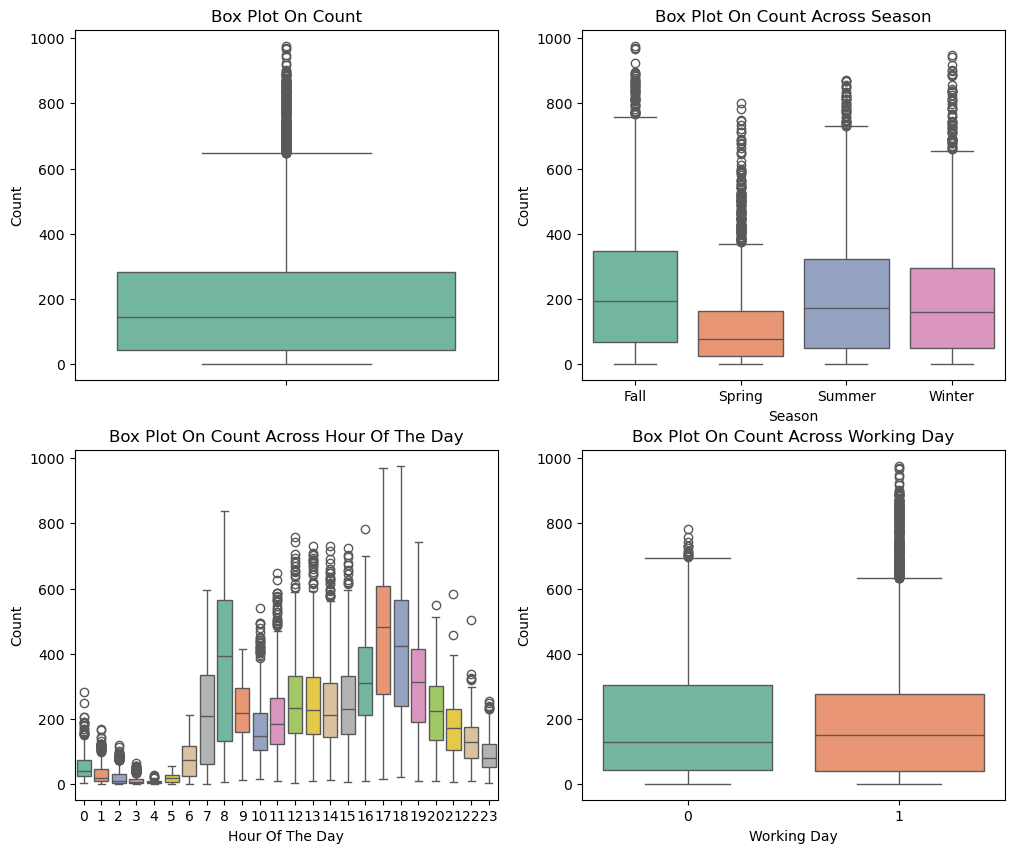

In [38]:
#plot the feature so the feature engineering  would be easier; 
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sn.boxplot(data=train, y="count", palette="Set2", orient="v", legend=False, ax=axes[0][0])
sn.boxplot(data=train, y="count", hue="season", palette="Set2", x="season", orient="v", legend=False, ax=axes[0][1])
sn.boxplot(data=train, y="count", hue="hour", palette="Set2", x="hour", orient="v", legend=False, ax=axes[1][0])
sn.boxplot(data=train, y="count", hue="workingday", palette="Set2", x="workingday", orient="v", legend=False, ax=axes[1][1])

axes[0][0].set(ylabel="Count",title="Box Plot On Count")
axes[0][1].set(xlabel="Season", ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel="Hour Of The Day", ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel="Working Day", ylabel='Count',title="Box Plot On Count Across Working Day")

In [39]:
#Use the zscore to remove the outlires from count:

train_target_no_out = zscore(train["count"])
train = train[train_target_no_out.abs() <= 3]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10739 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10739 non-null  category
 1   holiday     10739 non-null  category
 2   workingday  10739 non-null  category
 3   weather     10739 non-null  category
 4   temp        10739 non-null  float64 
 5   atemp       10739 non-null  float64 
 6   humidity    10739 non-null  int64   
 7   windspeed   10739 non-null  float64 
 8   count       10739 non-null  int64   
 9   hour        10739 non-null  category
 10  weekday     10739 non-null  category
 11  month       10739 non-null  category
dtypes: category(7), float64(3), int64(2)
memory usage: 578.7 KB


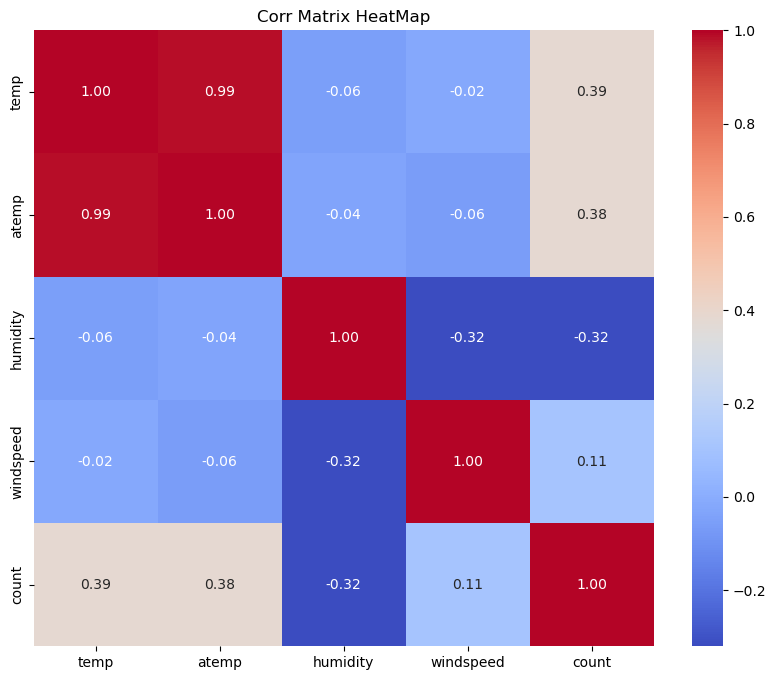

In [40]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train_to_corr = train
catVar = ["season", "holiday", "workingday", "weather", "hour", "weekday", "month"]
for var in catVar:
    train_to_corr = train_to_corr.drop(var, axis=1)
    
plt.figure(figsize=(10, 8)) 
sns.heatmap(train_to_corr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Corr Matrix HeatMap")
plt.show()

[Text(0.5, 0, 'Hour in a Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Mean Count during hour day during weekday'),
 None]

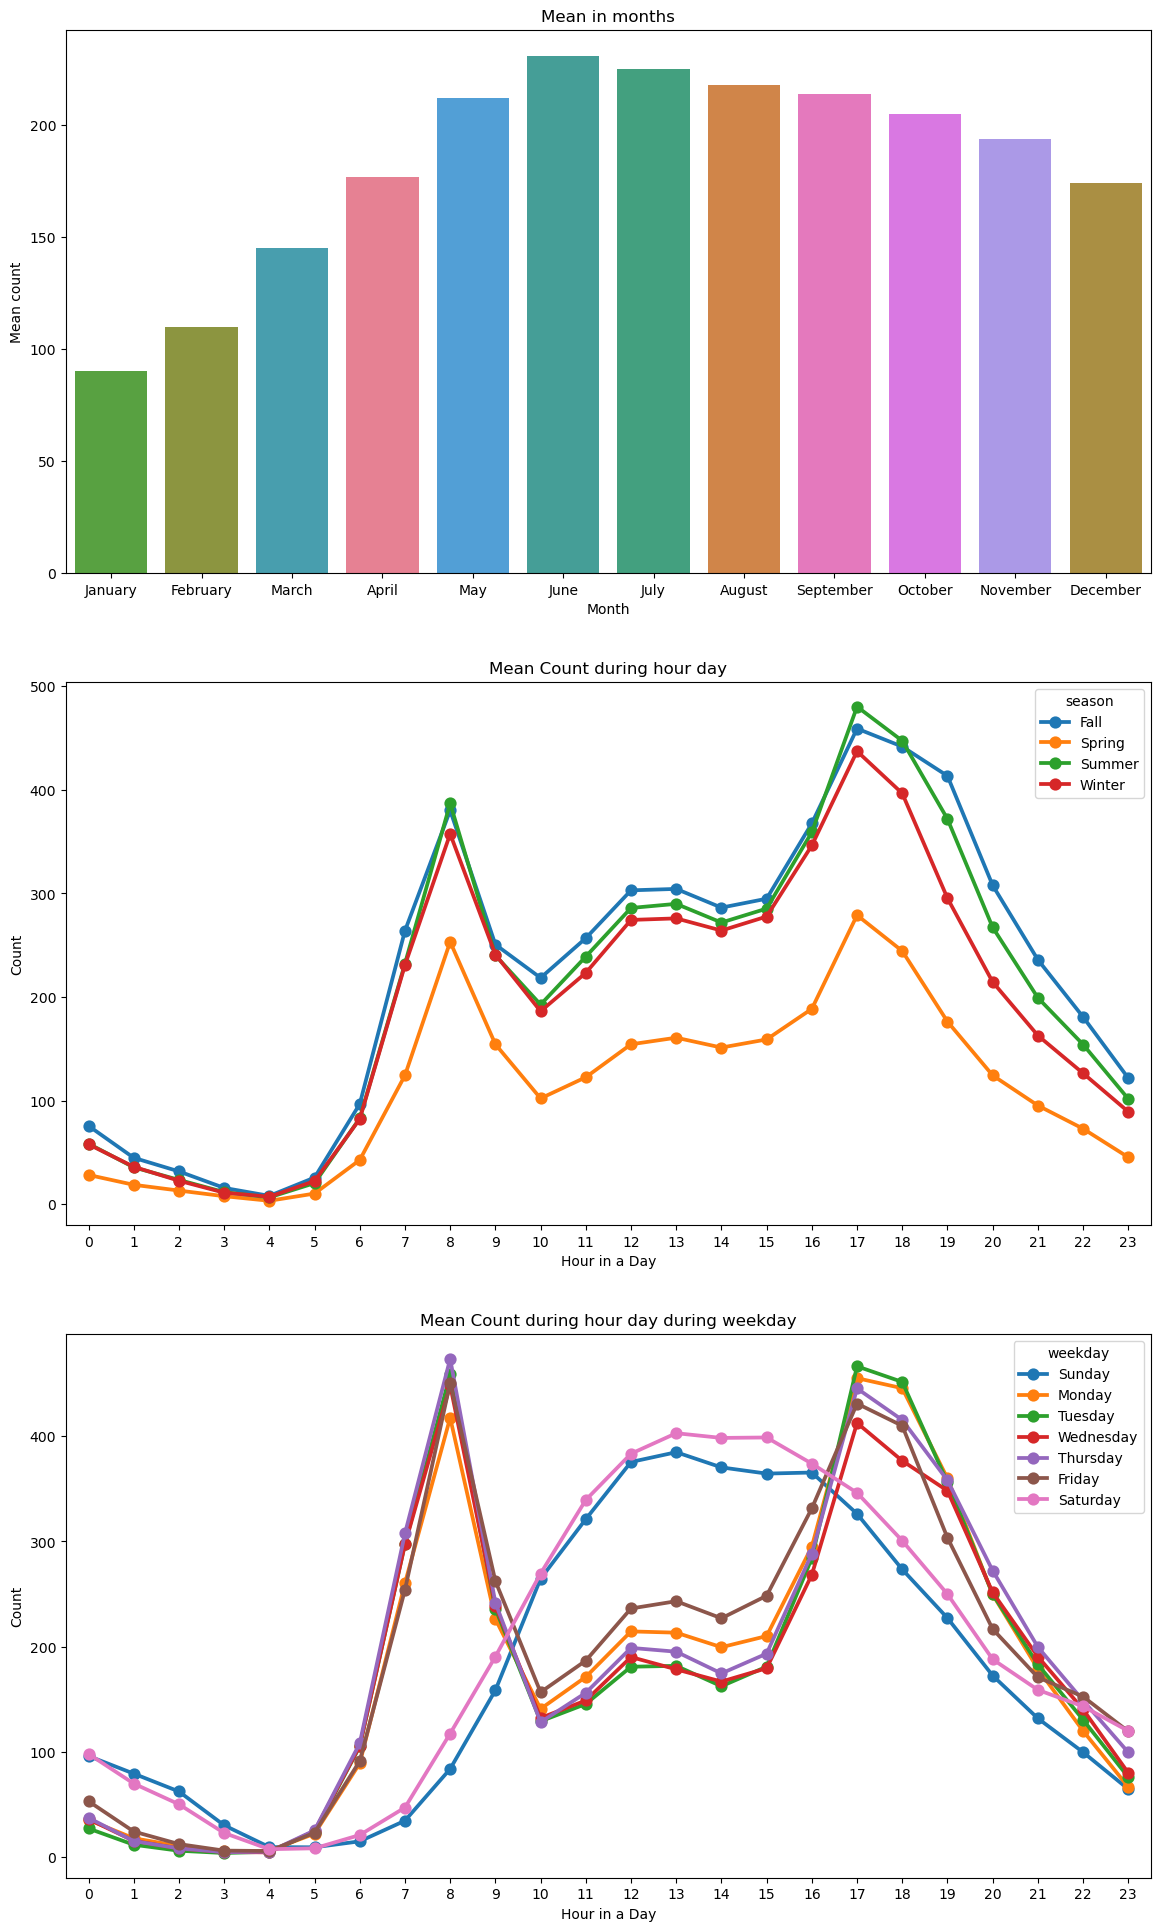

In [41]:
#Visualise if we can find some categories in our feature with our target:
fig,(graf1,graf2,graf3)= plt.subplots(nrows=3)
fig.set_size_inches(14,24)
monthOrdCol = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
weekOrdCol = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

monthAggr = pd.DataFrame(train.groupby("month", observed=False)["count"].mean()).reset_index()
monthSort = monthAggr.sort_values(by="count",ascending=False)
sn.barplot(data=monthSort, x="month", y="count", ax=graf1, order=monthOrdCol, hue="month")
graf1.set(xlabel='Month', ylabel='Mean count', title="Mean in months")

hourAggr = pd.DataFrame(train.groupby(["hour","season"],sort=True, observed=False)["count"].mean()).reset_index()
sn.pointplot(x=hourAggr["hour"], y=hourAggr["count"], hue=hourAggr["season"], data=hourAggr, ax=graf2)
graf2.set(xlabel='Hour in a Day', ylabel='Count',title="Mean Count during hour day",label='big')

hourAggr = pd.DataFrame(train.groupby(["hour","weekday"],sort=True, observed=False)["count"].mean()).reset_index()
sn.pointplot(x=hourAggr["hour"], y=hourAggr["count"], hue=hourAggr["weekday"], hue_order=weekOrdCol, data=hourAggr, ax=graf3)
graf3.set(xlabel='Hour in a Day', ylabel='Count', title="Mean Count during hour day during weekday", label='big')


In [42]:

#Create another boolean feature for peak hours in weekday:
train.loc[:, "peak_hour_during_week"] = (
    train["hour"].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
    *train["weekday"].apply(lambda x: 1 if x not in ["Saturday", "Sanday"] else 0)
)
test.loc[:, "peak_hour_during_week"] = (
    test["hour"].apply(lambda x: 1 if x in [7, 8, 9, 17, 18, 19] else 0)
    *train["weekday"].apply(lambda x: 1 if x not in ["Saturday", "Sanday"] else 0)
)

#Feature with category for "temp"
train.loc[:, "temp_category"] = (
    pd.cut(train["temp"], bins=[-float("inf"), 10, 25, float("inf")], labels=["Cold", "Mild", "Hot"])
)
test.loc[:, "temp_category"] = (
    pd.cut(test["temp"], bins=[-float("inf"), 10, 25, float("inf")], labels=["Cold", "Mild", "Hot"])
)
 
#Create another boolean feature for peak hours in weekend:
train.loc[:, "peak_hour_weekend"] = (
    train["hour"].apply(lambda x: 1 if x in [10, 11, 12, 13, 14, 15, 16] else 0)
    *train["weekday"].apply(lambda x: 1 if x in ["Saturday", "Sanday"] else 0)
)
test.loc[:, "peak_hour_weekend"] = (
    test["hour"].apply(lambda x: 1 if x in [10, 11, 12, 13, 14, 15, 16] else 0)
    *train["weekday"].apply(lambda x: 1 if x in ["Saturday", "Sanday"] else 0)
)

#Create another boolean feature for near the summer season:
train.loc[:, "near_summer"] = (
    train["month"].apply(lambda x: 1 if x in ["May", "June", "July", "May", "August", "September"] else 0)
) 
test.loc[:, "near_summer"] = (
    test["month"].apply(lambda x: 1 if x in ["May", "June", "July", "May", "August", "September"] else 0)
)
                                                                            


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10739 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   season                 10739 non-null  category
 1   holiday                10739 non-null  category
 2   workingday             10739 non-null  category
 3   weather                10739 non-null  category
 4   temp                   10739 non-null  float64 
 5   atemp                  10739 non-null  float64 
 6   humidity               10739 non-null  int64   
 7   windspeed              10739 non-null  float64 
 8   count                  10739 non-null  int64   
 9   hour                   10739 non-null  category
 10  weekday                10739 non-null  category
 11  month                  10739 non-null  category
 12  peak_hour_during_week  10739 non-null  int64   
 13  temp_category          10739 non-null  category
 14  peak_hour_weekend      10739 non-null  int6

In [44]:
train.head(20)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,weekday,month,peak_hour_during_week,temp_category,peak_hour_weekend,near_summer
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0000,16,0,Saturday,January,0,Cold,0,0
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,40,1,Saturday,January,0,Cold,0,0
2,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,32,2,Saturday,January,0,Cold,0,0
3,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,13,3,Saturday,January,0,Cold,0,0
4,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,1,4,Saturday,January,0,Cold,0,0
5,Spring,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + F...",9.84,12.880,75,6.0032,1,5,Saturday,January,0,Cold,0,0
6,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0000,2,6,Saturday,January,0,Cold,0,0
7,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,8.20,12.880,86,0.0000,3,7,Saturday,January,0,Cold,0,0
8,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0000,8,8,Saturday,January,0,Cold,0,0
9,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,13.12,17.425,76,0.0000,14,9,Saturday,January,0,Mild,0,0


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [45]:
#Did it before

array([[<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'peak_hour_during_week'}>],
       [<Axes: title={'center': 'peak_hour_weekend'}>,
        <Axes: title={'center': 'near_summer'}>, <Axes: >]], dtype=object)

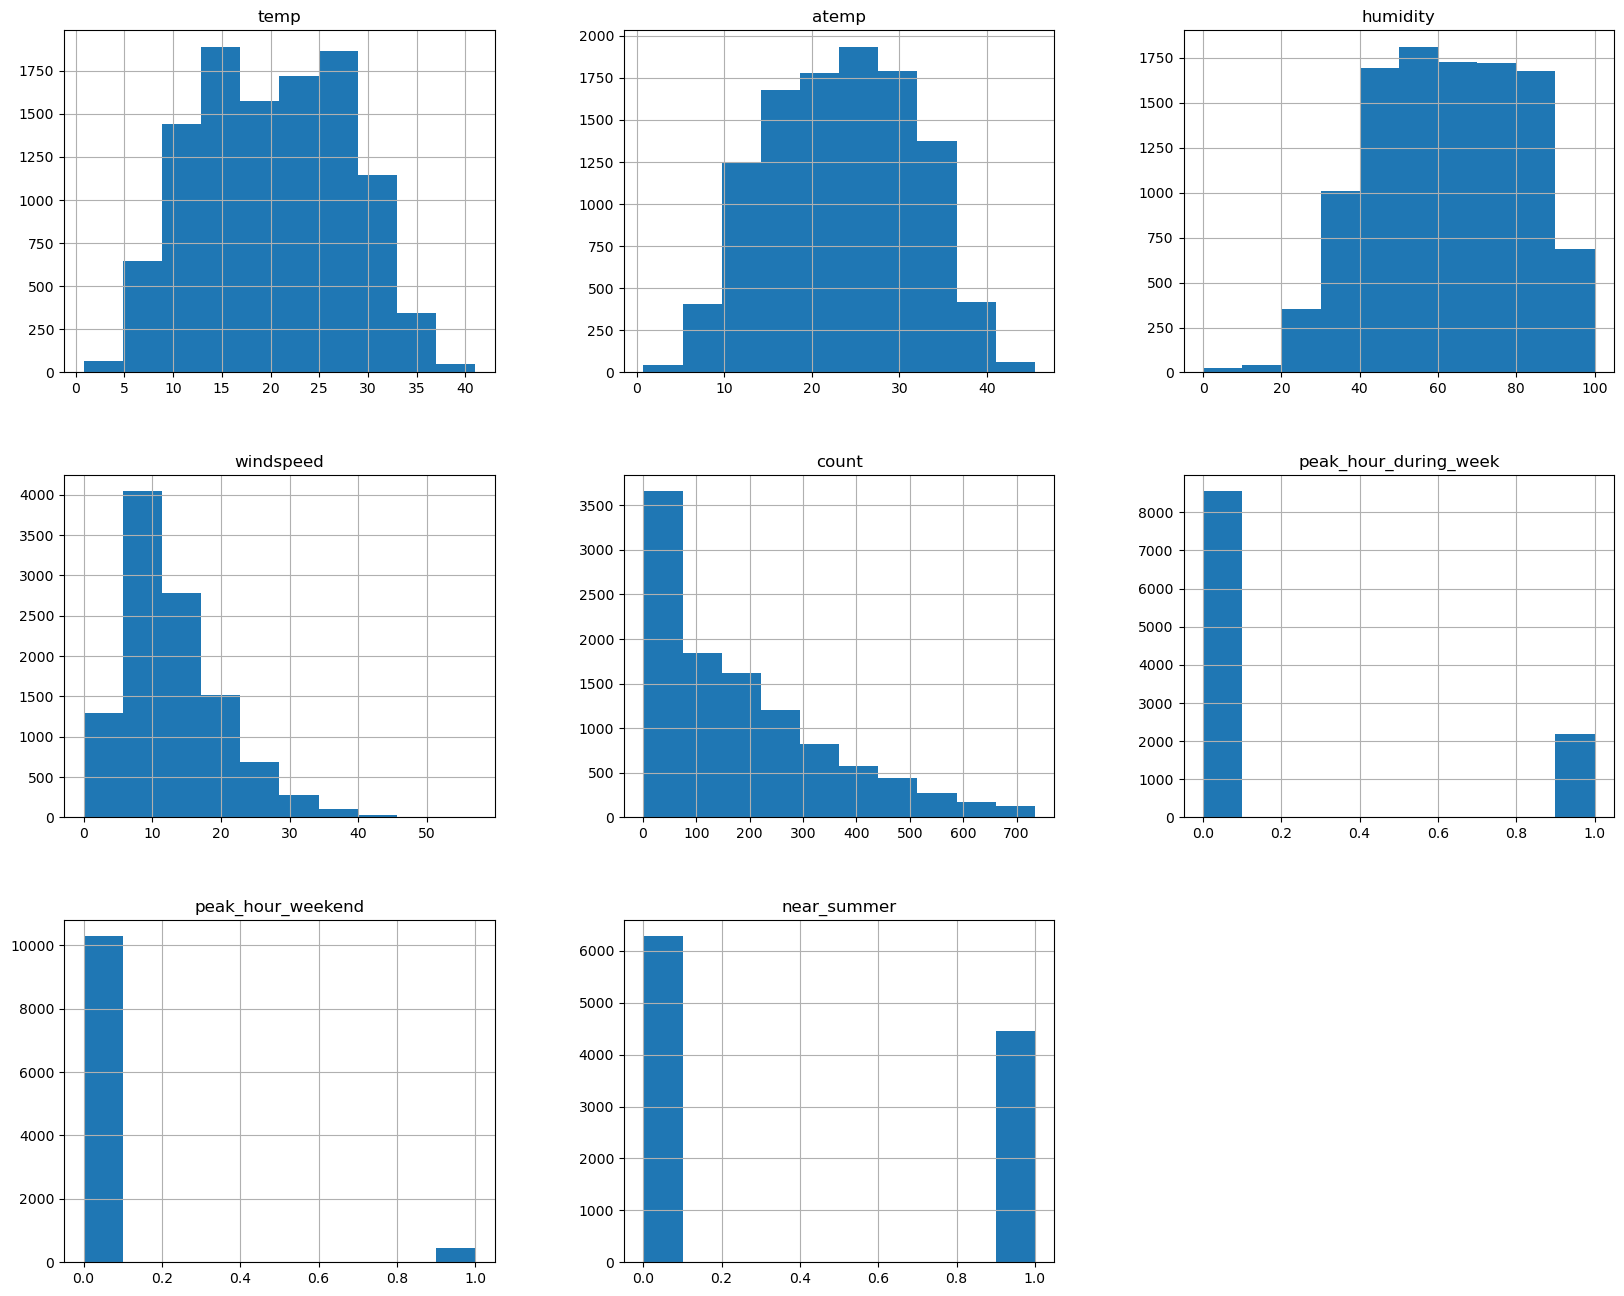

In [46]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,16))

## Step 5: Rerun the model with the same settings as before, just with more features

In [47]:
predictor_NoHypWithEDA = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters=model_default_hyperp
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241224_124202"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 23 17:17:00 UTC 2024
CPU Count:          2
Memory Avail:       1.46 GB / 3.76 GB (38.9%)
Disk Space Avail:   19.11 GB / 19.99 GB (95.6%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of 

In [48]:
predictor_NoHypWithEDA.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -54.882451  root_mean_squared_error       7.883710  340.518089                0.000788           0.031048            3       True         10
1    WeightedEnsemble_L2 -55.071752  root_mean_squared_error       4.853501  207.691084                0.000838           0.019975            2       True          5
2        LightGBM_BAG_L2 -55.613135  root_mean_squared_error       7.044212  288.214460                0.100829          19.654514            2       True          6
3         XGBoost_BAG_L2 -55.677224  root_mean_squared_error       7.133027  294.305032                0.189644          25.745085            2       True          8
4        LightGBM_BAG_L1 -55.818701  root_mean_squared_error       3.607377   43.602752                3.607

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L2': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -55.81870099195322,
  'RandomForest_BAG_L1': -59.70715529078312,
  'XGBoost_BAG_L1': -62.048787553046665,
  'NeuralNetTorch_BAG_L1': -64.5738389294008,
  'WeightedEnsemble_L2': -55.07175214941492,
  'LightGBM_BAG_L2': -55.61313496696019,
  'RandomForest_BAG_L2': -56.18962718810117,
  'XGBoost_BAG_L2': -55.67722432561003,
  'NeuralNetTorch_BAG_L2': -58.31567198267246,
  'WeightedEnsemble_

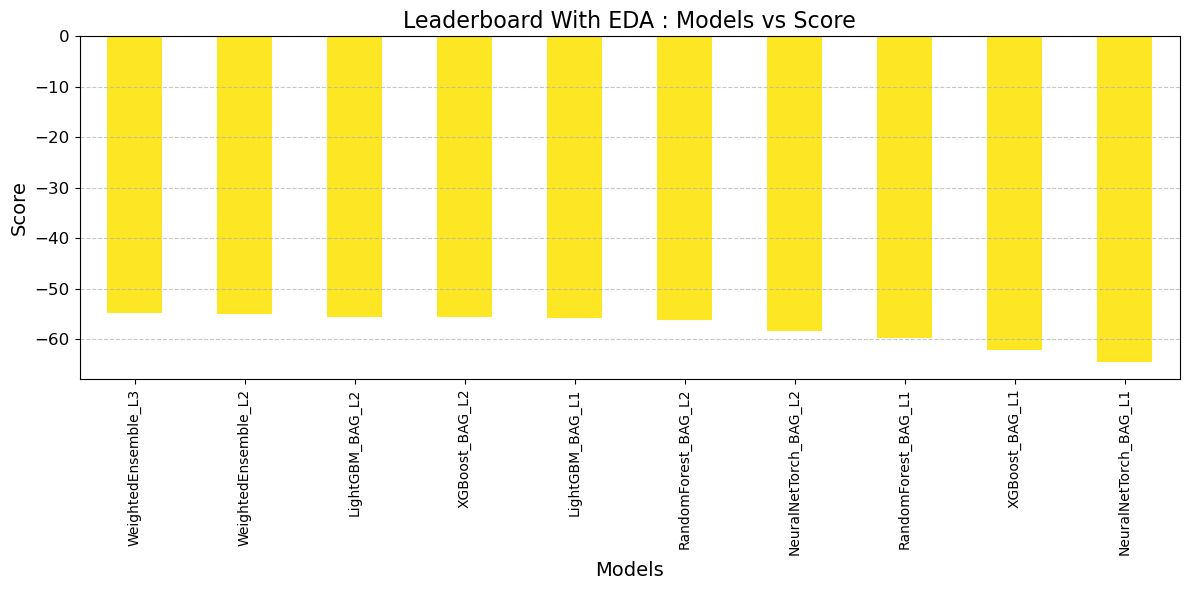

In [49]:
leaderboard2 = predictor_NoHypWithEDA.leaderboard(silent=True)

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.viridis(leaderboard2["score_val"] / leaderboard2["score_val"].max())

leaderboard2.plot(
    kind="bar",
    x="model",
    y="score_val",
    ax=ax,
    color=colors,
    legend=False
)

plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Leaderboard With EDA : Models vs Score", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.tight_layout()
plt.show()

In [51]:
# I had problems taking only the first five element because they was not ordered as expected;

sorted_leaderboard2 = predictor_NoHypWithEDA.leaderboard(silent=True).sort_values(by='score_val', ascending=False)
top5_best_model2 = sorted_leaderboard2['model'].head(5).tolist()
print(top5_best_model2)

['WeightedEnsemble_L3', 'WeightedEnsemble_L2', 'LightGBM_BAG_L2', 'XGBoost_BAG_L2', 'LightGBM_BAG_L1']


In [67]:

prediction_list_NoHypWithEDA[0].describe()

count    6493.000000
mean      182.742416
std       153.461349
min        -6.265674
25%        48.676079
50%       149.722946
75%       278.060852
max       670.593079
Name: count, dtype: float64

In [52]:
prediction_list_NoHypWithEDA = []

for model in top5_best_model:
    predictionNoHypWithEDA = predictor_NoHypWithEDA.predict(test, model=model)
    prediction_list_NoHypWithEDA.append(predictionNoHypWithEDA)

In [68]:
file_names2 = [
    "NoHypWithEDA_dir/SubmissionNoHypWithEDAModel1.csv",
    "NoHypWithEDA_dir/SubmissionNoHypWithEDAModel2.csv",
    "NoHypWithEDA_dir/SubmissionNoHypWithEDAModel3.csv",
    "NoHypWithEDA_dir/SubmissionNoHypWithEDAModel4.csv",
    "NoHypWithEDA_dir/SubmissionNoHypWithEDAModel5.csv"
]

# Be sure that count prediction don't have negative value 
prediction_list_NoHypWithEDA[0] = prediction_list_NoHypWithEDA[0].clip(lower=0)
prediction_list_NoHypWithEDA[4] = prediction_list_NoHypWithEDA[4].clip(lower=0)        

for prediction, file_name in zip(prediction_list_NoHypWithEDA, file_names2):
    submissionNoHypNoEDA = pd.read_csv(file_name)
    submissionNoHypNoEDA["count"] = prediction
    submissionNoHypNoEDA.to_csv(file_name, index=False)

In [69]:
!kaggle competitions submit -c bike-sharing-demand -f NoHypWithEDA_dir/SubmissionNoHypWithEDAModel1.csv -m "Test2_Model1 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypWithEDA_dir/SubmissionNoHypWithEDAModel2.csv -m "Test2_Model2 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypWithEDA_dir/SubmissionNoHypWithEDAModel3.csv -m "Test2_Model3 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypWithEDA_dir/SubmissionNoHypWithEDAModel4.csv -m "Test2_Model4 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f NoHypWithEDA_dir/SubmissionNoHypWithEDAModel5.csv -m "Test2_Model5 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF"


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 670kB/s]
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 730kB/s]
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 714kB/s]
100%|█████████████████████████████████████████| 182k/182k [00:00<00:00, 717kB/s]
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 722kB/s]
Successfully submitted to Bike Sharing Demand

In [70]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                          date                 description                                                                        status    publicScore  privateScore  
--------------------------------  -------------------  ---------------------------------------------------------------------------------  --------  -----------  ------------  
SubmissionNoHypWithEDAModel5.csv  2024-12-24 14:03:10  Test2_Model5 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF         complete  0.58821      0.58821       
SubmissionNoHypWithEDAModel4.csv  2024-12-24 14:03:08  Test2_Model4 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF         complete  0.50483      0.50483       
SubmissionNoHypWithEDAModel3.csv  2024-12-24 14:03:06  Test2_Model3 with no hyperparameter With EDA using: XGB, GBM, NN_TORCH, RF         complete  0.52063      0.52063       
SubmissionNoHypWithEDAModel2.csv  2024-12-24 14:03:04  Test2_Model2 with no hyperparameter With EDA using: XGB, GBM, NN_

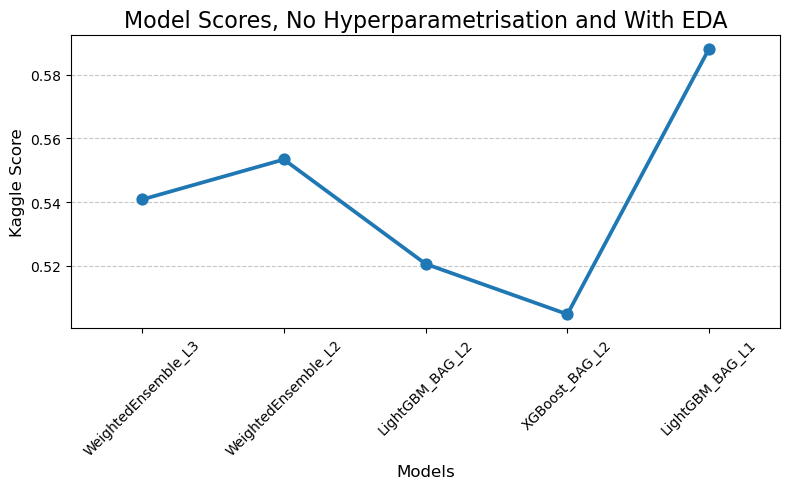

In [71]:
kaggleScoreNoHypWithEDA = [0.54085, 0.55341, 0.52063, 0.50483, 0.58821]
data = pd.DataFrame({'Model': top5_best_model2, 'Score': kaggleScoreNoHypWithEDA})

# Plot
plt.figure(figsize=(8, 5))
sns.pointplot(data=data, x='Model', y='Score', markers='o', linestyles='-')

plt.title("Model Scores, No Hyperparametrisation and With EDA", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Kaggle Score", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### New Score of `[0.54085, 0.55341, 0.52063, 0.50483, 0.58821]`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [97]:
model_custom_hyperp = {
    "XGB":{ 
            "n_estimators": 3000,
            "max_depth": 4,
            "learning_rate": 0.01
    },
    "RF": {
            "n_estimators": 2000,
            "max_depth": 15,
            "min_samples_split": 5,
            "min_samples_leaf": 2,
            "max_features": "sqrt"
        },
    "NN_TORCH": { 
            "hidden_size": 128, 
            "dropout_prob": 0.2,
            "activation": 'relu',
            "learning_rate": 0.01,
            "epochs": 50
        },
    "GBM": {
        "n_estimators": 4000,  
        "num_leaves": 10,  
        "max_depth": 4,  
         "learning_rate": 0.01,  
        "objective": "regression" 
    }
}   
model_custom_hyperp2 = {
    "XGB":{ 
            "n_estimators": 4000,
            "max_depth": 6,
            "learning_rate": 0.05
    },
    "RF": {
            "n_estimators": 3000,
            "max_depth": 10,
            "min_samples_split": 7,
            "min_samples_leaf": 3,
            "max_features": "sqrt"
        },
    "NN_TORCH": { 
            "hidden_size": 256, 
            "dropout_prob": 0.25,
            "activation": 'relu',
            "learning_rate": 0.02,
            "epochs": 100
        },
    "GBM": {
        "n_estimators": 5000,  
        "num_leaves": 15,  
        "max_depth": 6,  
         "learning_rate": 0.05,  
        "objective": "regression" 
    }
}   
predictor_WithHypWithEDA = TabularPredictor(label="count", problem_type="regression", eval_metric="root_mean_squared_error").fit(
    train_data=train,
    time_limit=600,
    presets="best_quality",
    hyperparameters = model_custom_hyperp2,
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241224_151216"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Oct 23 17:17:00 UTC 2024
CPU Count:          2
Memory Avail:       0.96 GB / 3.76 GB (25.4%)
Disk Space Avail:   17.75 GB / 19.99 GB (88.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of 

In [98]:
predictor_WithHypWithEDA.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -56.195862  root_mean_squared_error      14.314977  221.555152                0.000807           0.072366            3       True          8
1  WeightedEnsemble_L2 -56.423075  root_mean_squared_error       5.538813   49.408484                0.000793           0.056002            2       True          4
2      LightGBM_BAG_L1 -56.518351  root_mean_squared_error       3.621433   39.908033                3.621433          39.908033            1       True          1
3  RandomForest_BAG_L2 -56.699937  root_mean_squared_error      13.879380  187.044100                2.374194          21.557343            2       True          6
4      LightGBM_BAG_L2 -56.976228  root_mean_squared_error      11.615907  191.547952                0.110722         

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1': -56.51835076765352,
  'RandomForest_BAG_L1': -76.6524383101938,
  'XGBoost_BAG_L1': -62.44203984857232,
  'WeightedEnsemble_L2': -56.42307491331323,
  'LightGBM_BAG_L2': -56.97622759042574,
  'RandomForest_BAG_L2': -56.69993683950034,
  'XGBoost_BAG_L2': -57.273966071053465,
  'WeightedEnsemble_L3': -56.19586159235518},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1': ['LightGBM_BAG_L1'],
  'RandomForest_BAG_L1': ['RandomForest_BAG_L1'],
  'XGBoost_BAG_L1': ['XGBoost_BAG_L1'],
  'WeightedEnsemble_L2': ['We

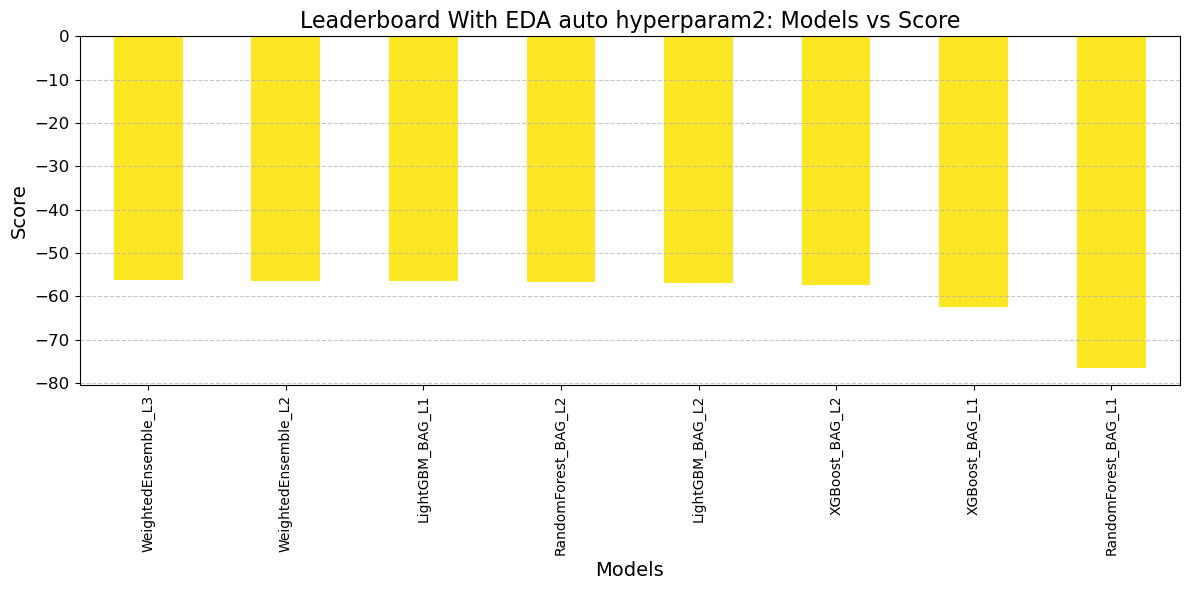

In [99]:
leaderboard4 = predictor_WithHypWithEDA.leaderboard(silent=True)

fig, ax = plt.subplots(figsize=(12, 6))
colors = plt.cm.viridis(leaderboard4["score_val"] / leaderboard4["score_val"].max())

leaderboard4.plot(
    kind="bar",
    x="model",
    y="score_val",
    ax=ax,
    color=colors,
    legend=False
)

plt.yticks(fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Leaderboard With EDA auto hyperparam2: Models vs Score", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Score", fontsize=14)

plt.tight_layout()
plt.show()

In [100]:
# I had problems taking only the first five element because they was not ordered as expected;

sorted_leaderboard4 = predictor_WithHypWithEDA.leaderboard(silent=True).sort_values(by='score_val', ascending=False)
top5_best_model4 = sorted_leaderboard4['model'].head(5).tolist()
print(top5_best_model4)

['WeightedEnsemble_L3', 'WeightedEnsemble_L2', 'LightGBM_BAG_L1', 'RandomForest_BAG_L2', 'LightGBM_BAG_L2']


In [101]:
prediction_list_WithHyp2WithEDA = []

for model in top5_best_model4:
    predictionWithHyp2WithEDA = predictor_WithHypWithEDA.predict(test, model=model)
    prediction_list_WithHyp2WithEDA.append(predictionWithHyp2WithEDA)

In [102]:
file_names4 = [
    "WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel1.csv",
    "WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel2.csv",
    "WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel3.csv",
    "WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel4.csv",
    "WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel5.csv"
]

# Be sure that count prediction don't have negative value 
prediction_list_WithHyp2WithEDA[0] = prediction_list_WithHyp2WithEDA[0].clip(lower=0) 
prediction_list_WithHyp2WithEDA[1] = prediction_list_WithHyp2WithEDA[1].clip(lower=0)
prediction_list_WithHyp2WithEDA[2] = prediction_list_WithHyp2WithEDA[2].clip(lower=0)
prediction_list_WithHyp2WithEDA[3] = prediction_list_WithHyp2WithEDA[3].clip(lower=0) 
prediction_list_WithHyp2WithEDA[4] = prediction_list_WithHyp2WithEDA[4].clip(lower=0)         

for prediction, file_name in zip(prediction_list_WithHyp2WithEDA, file_names4):
    submissionNoHypNoEDA = pd.read_csv(file_name)
    submissionNoHypNoEDA["count"] = prediction
    submissionNoHypNoEDA.to_csv(file_name, index=False)

In [ ]:
kaggleScoreNoHypWithEDA = [0.54085, 0.55341, 0.52063, 0.50483, 0.58821]
data = pd.DataFrame({'Model': top5_best_model2, 'Score': kaggleScoreNoHypWithEDA})

# Plot
plt.figure(figsize=(8, 5))
sns.pointplot(data=data, x='Model', y='Score', markers='o', linestyles='-')

plt.title("Model Scores, No Hyperparametrisation and With EDA", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Kaggle Score", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [103]:
!kaggle competitions submit -c bike-sharing-demand -f WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel1.csv -m "Test4_Model1 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel2.csv -m "Test4_Model2 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel3.csv -m "Test4_Model3 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel4.csv -m "Test4_Model4 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF"
!kaggle competitions submit -c bike-sharing-demand -f WithHyp2WithEDA_dir/SubmissionWithHyp2WithEDAModel5.csv -m "Test4_Model5 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF"


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 716kB/s]
100%|█████████████████████████████████████████| 187k/187k [00:00<00:00, 704kB/s]
100%|█████████████████████████████████████████| 187k/187k [00:00<00:00, 706kB/s]
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 769kB/s]
100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 642kB/s]
Successfully submitted to Bike Sharing Demand

In [104]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                             date                 description                                                                 status    publicScore  privateScore  
-----------------------------------  -------------------  --------------------------------------------------------------------------  --------  -----------  ------------  
SubmissionWithHyp2WithEDAModel5.csv  2024-12-24 15:36:53  Test4_Model5 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF    complete  0.58092      0.58092       
SubmissionWithHyp2WithEDAModel4.csv  2024-12-24 15:36:51  Test4_Model4 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF    complete  0.53583      0.53583       
SubmissionWithHyp2WithEDAModel3.csv  2024-12-24 15:36:49  Test4_Model3 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF    complete  0.68892      0.68892       
SubmissionWithHyp2WithEDAModel2.csv  2024-12-24 15:36:47  Test4_Model2 with hyperparameter2 With EDA using: XGB, GBM, NN_TORCH, RF    comple

#### New Score of HP01 `[0.52194, 0.53101, 0.51566, 0.54050, 0.63741]`

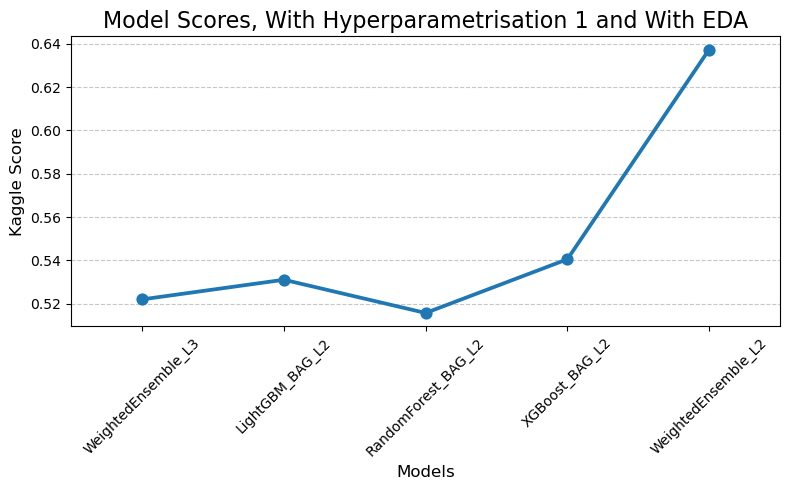

In [105]:
kaggleScoreWithHypWithEDA = [0.52194, 0.53101, 0.51566, 0.54050, 0.63741]
data = pd.DataFrame({'Model': top5_best_model3, 'Score': kaggleScoreWithHypWithEDA})

# Plot
plt.figure(figsize=(8, 5))
sns.pointplot(data=data, x='Model', y='Score', markers='o', linestyles='-')

plt.title("Model Scores, With Hyperparametrisation 1 and With EDA", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Kaggle Score", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### New Score of HP02`[0.59371, 0.66390, 0.68892, 0.53583, 0.58092]`

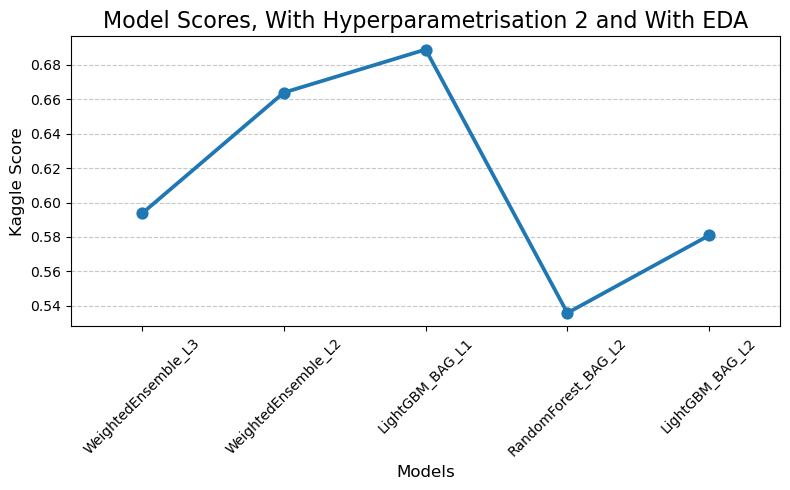

In [106]:
kaggleScoreWithHyp2WithEDA = [0.59371, 0.66390, 0.68892, 0.53583, 0.58092]
data = pd.DataFrame({'Model': top5_best_model4, 'Score': kaggleScoreWithHyp2WithEDA})

# Plot
plt.figure(figsize=(8, 5))
sns.pointplot(data=data, x='Model', y='Score', markers='o', linestyles='-')

plt.title("Model Scores, With Hyperparametrisation 2 and With EDA", fontsize=16)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Kaggle Score", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

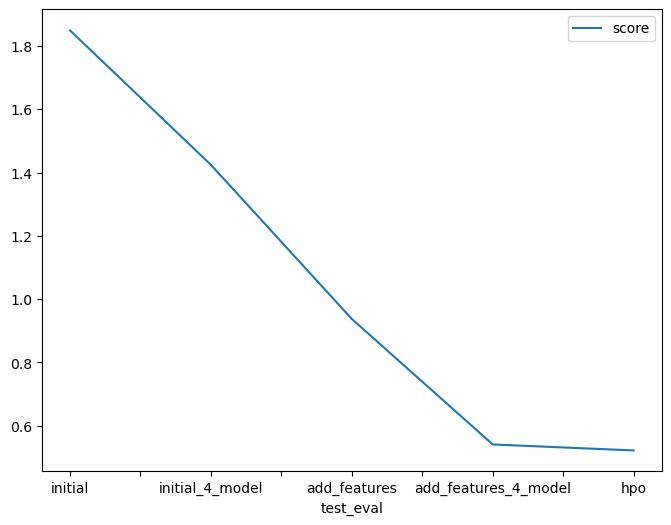

In [108]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "initial_4_model", "add_features", "add_features_4_model", "hpo"],
        "score": [1.84933,1.42460, 0.93741, 0.54085, 0.52194]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')